In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import statistics
import operator
import warnings
warnings.filterwarnings("ignore")



## __Data Importing__

In [2]:
anime = pd.read_csv('anime.csv')
anime.head(1)
#print(anime.info())

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630


In [3]:
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [4]:
anime['type'].value_counts()

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64

## __Missing Values__

In [5]:
anime['genre'].fillna('Unknow',inplace=True)
anime['type'].fillna('Unknow',inplace=True)
anime['episodes'] = pd.to_numeric(anime['episodes'],errors='coerce').fillna(0)
anime['rating'].fillna(anime['rating'].mean(),inplace=True)

In [6]:
anime.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [7]:
anime.describe()

,anime_id,episodes,rating,members
count,12294.000000,12294.000000,12294.000000,1.229400e+04
mean,14058.221653,12.040101,6.473902,1.807134e+04
std,11455.294701,46.257299,1.017096,5.482068e+04
min,1.000000,0.000000,1.670000,5.000000e+00
25%,3484.250000,1.000000,5.900000,2.250000e+02
50%,10260.500000,2.000000,6.550000,1.550000e+03
75%,24794.500000,12.000000,7.170000,9.437000e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


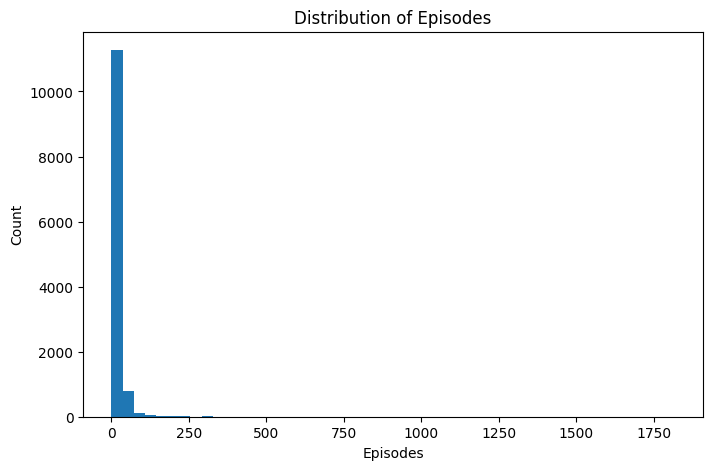

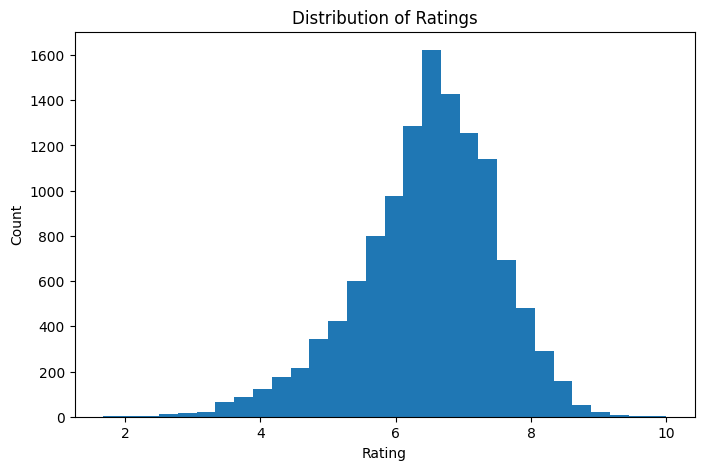

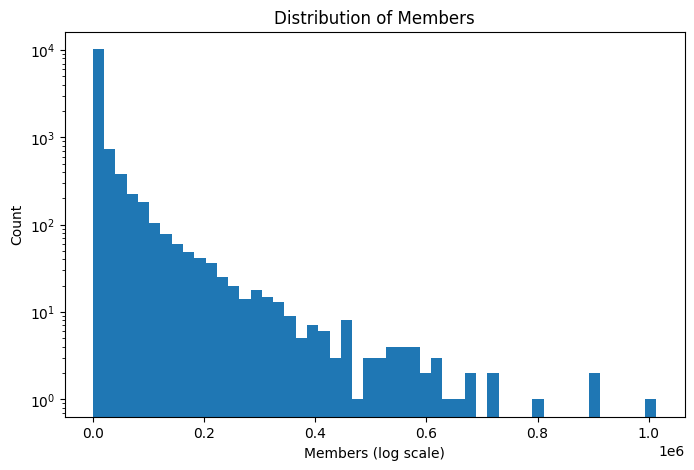

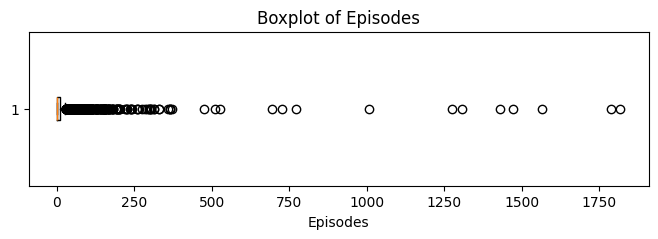

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: load your dataset
# anime = pd.read_csv("anime.csv")

# Histogram for episodes
plt.figure(figsize=(8,5))
plt.hist(anime["episodes"], bins=50)
plt.xlabel("Episodes")
plt.ylabel("Count")
plt.title("Distribution of Episodes")
plt.show()

# Histogram for rating
plt.figure(figsize=(8,5))
plt.hist(anime["rating"], bins=30)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

# Histogram for members (log scale because it's very skewed)
plt.figure(figsize=(8,5))
plt.hist(anime["members"], bins=50, log=True)
plt.xlabel("Members (log scale)")
plt.ylabel("Count")
plt.title("Distribution of Members")
plt.show()

# Boxplot for episodes (to see outliers)
plt.figure(figsize=(8,2))
plt.boxplot(anime["episodes"], vert=False)
plt.xlabel("Episodes")
plt.title("Boxplot of Episodes")
plt.show()


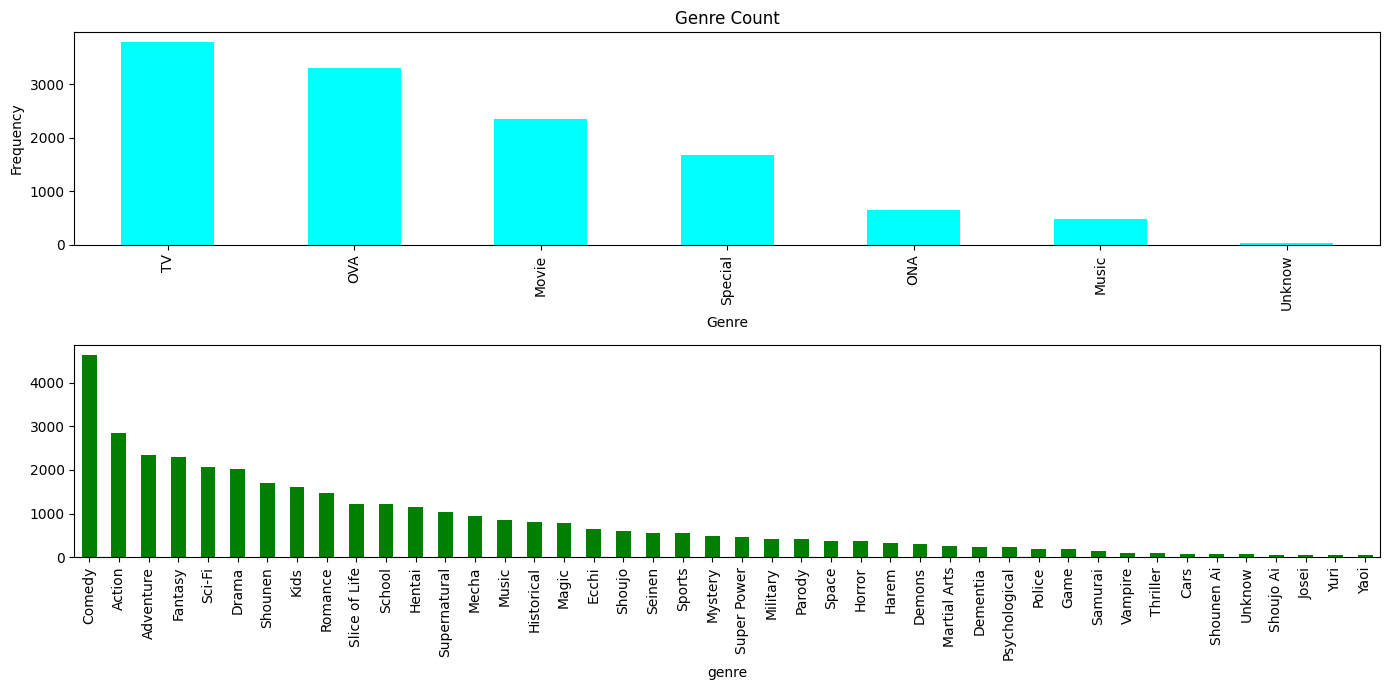

In [9]:
type_count = anime['type'].value_counts()
genre_count = anime['genre'].str.split(', ').explode().value_counts()

fig, ax = plt.subplots(2,1,figsize = (14,7))
type_count.plot(kind = 'bar',ax=ax[0],color='cyan')
ax[0].set_title('Anime Types')
ax[0].set_xlabel('type')
ax[0].set_ylabel('Frequency')

genre_count.plot(kind = 'bar',ax=ax[1],color='green')
ax[0].set_title('Genre Count')
ax[0].set_xlabel('Genre')
ax[0].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

__Anime Types__
- TV and ONA are the top most watched types

__Genre__
- Comedy is the top genre followed by ation, adventure and so on 

In [10]:
rating = pd.read_csv('rating.csv')
rating_df = rating[rating.rating != -1]
rating_df.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [11]:
rating_df.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [12]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [13]:
rating_df.shape

(6337241, 3)

In [14]:
rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [15]:
len(rating_df)

6337241

In [16]:
print('user_id : ',len(rating_df['user_id'].unique()))
print('anime_id : ',len(rating_df['anime_id'].unique()))

user_id :  69600
anime_id :  9927


In [17]:
import statistics
ratings_per_user = rating_df.groupby('user_id')['rating'].count()
mean_ratings_per_user = statistics.mean(ratings_per_user.tolist())
mean_ratings_per_user

91.05231321839081

*Average use has about 91 times rating*

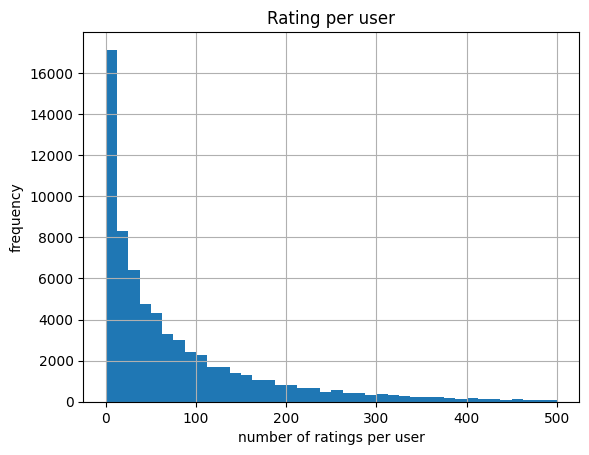

In [18]:
ratings_per_user.hist(bins=40,range=(0,500))
plt.xlabel('number of ratings per user')
plt.ylabel('frequency')
plt.title('Rating per user')
plt.show()

In [19]:
rating_per_anime = rating_df.groupby('anime_id')['rating'].count()
mean_ratings_per_anime = statistics.mean(rating_per_anime.tolist())
mean_ratings_per_anime

638.3843054296364

- *on an average each anime get atleast 638 ratings, means it show diverse range of viewer engagement*
 

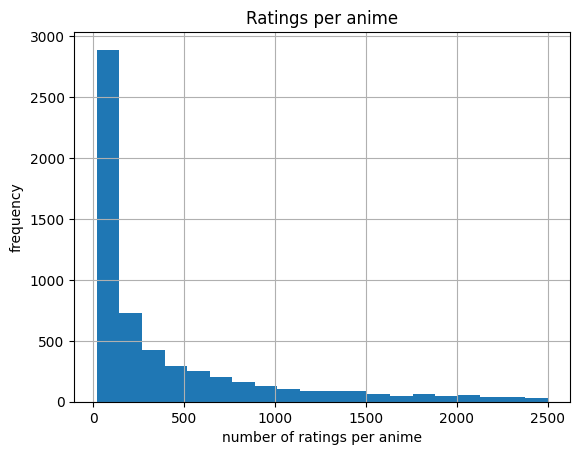

In [20]:
rating_per_anime.hist(bins=20,range=(20,2500))
plt.xlabel('number of ratings per anime')
plt.ylabel('frequency')
plt.title('Ratings per anime')
plt.show()

- from the above histogram it is clear that there are very few anime's that received rating more than 1000 time 

In [ ]:
# filtering (anime) ratings above than 1000
rating_per_anime_df = pd.DataFrame(rating_per_anime)
filtered_rating_per_anime_df = rating_per_anime_df[rating_per_anime_df.rating >=1000]
popular_anime = filtered_rating_per_anime_df.index.tolist()

In [24]:
# filtering (user) ratings above than 500
rating_per_user_df = pd.DataFrame(ratings_per_user)
filtered_rating_per_user_df = rating_per_user_df[rating_per_user_df.rating >=500]
profilic_user = filtered_rating_per_user_df.index.tolist()

In [31]:
# filtering the data set to include only ratings of popular anime
filtered_rating = rating_df[rating_df.anime_id.isin(popular_anime)]
filtered_rating = rating_df[rating_df.user_id.isin(profilic_user)]
len(filtered_rating)


1005314

## __Pivot Table__

In [34]:
rating_matrix = filtered_rating_anime.pivot_table(index='user_id',columns='anime_id',values='rating')
rating_matrix = rating_matrix.fillna(0)
rating_matrix.head()

anime_id,1,5,6,7,15,16,18,19,20,22,...,32281,32282,32379,32438,32542,32729,32828,32935,32998,34240
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,8.0,0.0,6.0,0.0,6.0,0.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- above table shows the interaction between user and items in the form of ratings.
- row -> user
- column -> anime title 

The formula for cosine similarity is as follows:

$$
\text{similarity}(u, v) = \cos(\theta) = \frac{\sum_{i \in I} r_{ui} \cdot r_{vi}}{\sqrt{\sum_{i \in I} r_{ui}^2} \cdot \sqrt{\sum_{i \in I} r_{vi}^2}}
$$

In [40]:
import operator

In [41]:
#defining a function to find similar user based on cosine similarity

def similar_user(user_id,matrix,k=3):
    user = matrix[matrix.index == user_id]
    other_users = matrix[matrix.index != user_id]
    similarity = cosine_similarity(user,other_users)[0].tolist()
    indices = other_users.index.tolist()
    index_similarity = dict(zip(indices,similarity))

    index_similarity_soreted = sorted(index_similarity.items(),key=operator.itemgetter(1))
    index_similarity_soreted.reverse()

    top_similar_user = index_similarity_soreted[:k]
    users = [u[0] for u in top_similar_user]
    return users

In [43]:
similar_user(1,rating_matrix)

[71834, 1776, 46337]

In [45]:
curr_user = 158
similar_user_indices = similar_user(curr_user,rating_matrix)
print(similar_user_indices)

[4921, 24483, 58075]


In [48]:
# defining a function to get reommend anime for a user based on average rating
def recommend_item(user_index, similar_user_indices, matrix, items=8):
    similar_user = matrix[matrix.index.isin(similar_user_indices)]
    similar_user = similar_user.mean(axis = 0)
    similar_user_df = pd.DataFrame(similar_user,columns=['mean'])
    user_df = matrix[matrix.index == user_index]
    user_df_transposed = user_df.transpose()
    user_df_transposed.columns = ['rating']
    user_df_transposed = user_df_transposed[user_df_transposed['rating']==0]
    anime_unseen = user_df_transposed.index.tolist()
    similar_user_df_filered = similar_user_df[similar_user_df.index.isin(anime_unseen)]
    similar_user_df_ordered = similar_user_df.sort_values(by=['mean'],ascending=False)

    top_n_anime = similar_user_df_ordered.head(items)
    top_n_anime_indices = top_n_anime.index.tolist()

    anime_info = anime[anime['anime_id'].isin(top_n_anime_indices)]
    return anime_info

In [50]:
recommend_item(201,similar_user_indices,rating_matrix)

,anime_id,name,genre,type,episodes,rating,members
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25.0,8.83,715151
251,2025,Darker than Black: Kuro no Keiyakusha,"Action, Mystery, Sci-Fi, Super Power",TV,25.0,8.25,440334
331,889,Black Lagoon,"Action, Seinen",TV,12.0,8.17,332562
334,934,Higurashi no Naku Koro ni,"Horror, Mystery, Psychological, Supernatural, ...",TV,26.0,8.17,359494
641,202,Wolf&#039;s Rain,"Action, Adventure, Drama, Fantasy, Mystery, Sc...",TV,26.0,7.93,171863
644,1818,Claymore,"Action, Adventure, Demons, Fantasy, Shounen, S...",TV,26.0,7.92,316853
760,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13.0,7.85,623511
1338,356,Fate/stay night,"Action, Fantasy, Magic, Romance, Supernatural",TV,24.0,7.58,374880
